In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("E:\Humaiz\diabetes_data_upload.csv")

In [3]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            518 non-null    object
 6   Polyphagia          519 non-null    object
 7   Genital thrush      519 non-null    object
 8   visual blurring     517 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        518 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     519 non-null    object
 13  muscle stiffness    519 non-null    object
 14  Alopecia            519 non-null    object
 15  Obesity             520 non-null    object
 16  class               519 no

In [5]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              2
Polyphagia            1
Genital thrush        1
visual blurring       3
Itching               0
Irritability          2
delayed healing       0
partial paresis       1
muscle stiffness      1
Alopecia              1
Obesity               0
class                 1
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<Axes: xlabel='Age'>

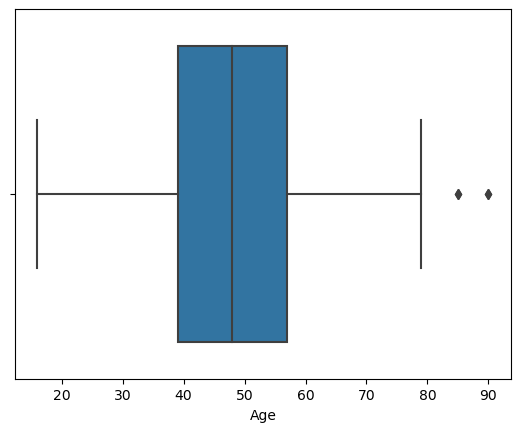

In [8]:
sns.boxplot(x=data['Age'])

In [9]:
z = np.abs(stats.zscore(data['Age']))
data['Age'] = np.where(z > 3, data['Age'].mean(), data['Age']).astype(int)

<Axes: xlabel='Age'>

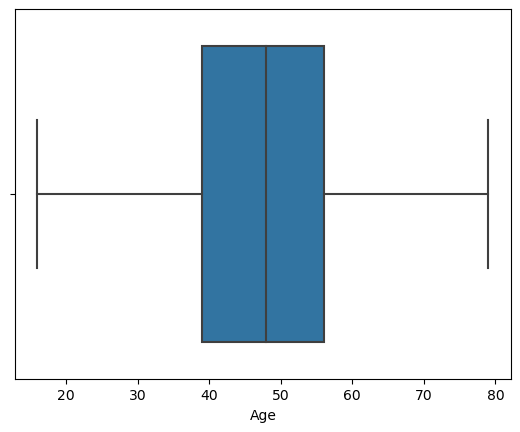

In [10]:
sns.boxplot(x=data['Age'])

In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {list(unique_values)}")
    print("-")

Unique values for Age: [40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 61, 54, 39, 48, 32, 42, 52, 38, 53, 37, 49, 63, 35, 30, 50, 46, 36, 51, 59, 65, 25, 43, 47, 28, 68, 56, 31, 72, 69, 79, 34, 16, 62, 33, 64, 27, 29, 26]
-
Unique values for Gender: ['Male', 'Female']
-
Unique values for Polyuria: ['No', 'Yes']
-
Unique values for Polydipsia: ['Yes', 'No']
-
Unique values for sudden weight loss: ['No', 'Yes']
-
Unique values for weakness: ['Yes', 'No']
-
Unique values for Polyphagia: ['No', 'Yes']
-
Unique values for Genital thrush: ['No', 'Yes']
-
Unique values for visual blurring: ['No', 'Yes']
-
Unique values for Itching: ['Yes', 'No']
-
Unique values for Irritability: ['No', 'Yes']
-
Unique values for delayed healing: ['Yes', 'No']
-
Unique values for partial paresis: ['No', 'Yes']
-
Unique values for muscle stiffness: ['Yes', 'No']
-
Unique values for Alopecia: ['Yes', 'No']
-
Unique values for Obesity: ['Yes', 'No']
-
Unique values for class: ['Positive', 'Negative']
-


In [12]:
scaler = MinMaxScaler()
data[['Age']] = scaler.fit_transform(data[['Age']])

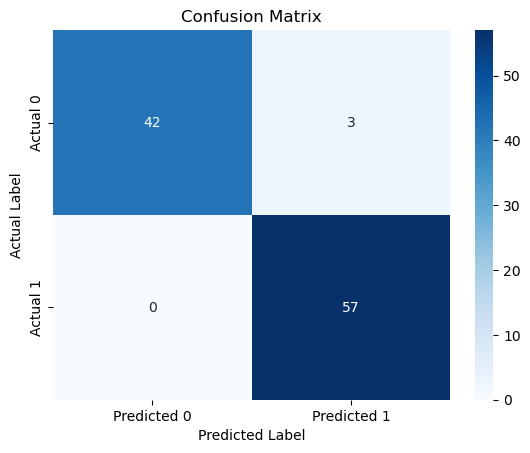


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.95      1.00      0.97        57

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [13]:
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
data[binary_columns] = data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


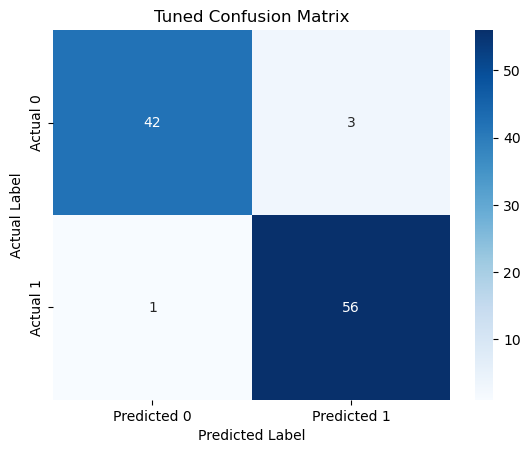


Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.95      0.98      0.97        57

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102



In [22]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=15)
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_scaled)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Tuned Confusion Matrix')
plt.show()
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))